In [47]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [48]:
pseGDP = pd.read_csv('COVID_PSchExpGDP.csv',index_col = 0)
pseGDP.head()

,State,cases,deaths,Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent)
0,Alabama,387786,14345,6885677.0,203398.0,3.385322
1,Alaska,18316,367,2319662.0,49429.0,4.692917
2,Arizona,426614,18857,8551673.0,311397.0,2.746228
3,Arkansas,161569,3301,4872214.0,120090.0,4.057135
4,California,2664110,102387,72003129.0,2663396.0,2.703433


In [49]:
pseGDP = pseGDP.drop(columns = ['cases', 'deaths'])
pseGDP.head()

,State,Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent)
0,Alabama,6885677.0,203398.0,3.385322
1,Alaska,2319662.0,49429.0,4.692917
2,Arizona,8551673.0,311397.0,2.746228
3,Arkansas,4872214.0,120090.0,4.057135
4,California,72003129.0,2663396.0,2.703433


In [50]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [51]:
pseGDP = pd.merge(pseGDP, COVID, how = 'left', on = 'State')
pseGDP.head()

,State,Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),cases,deaths
0,Alabama,6885677.0,203398.0,3.385322,26912,785
1,Alaska,2319662.0,49429.0,4.692917,751,10
2,Arizona,8551673.0,311397.0,2.746228,39298,1228
3,Arkansas,4872214.0,120090.0,4.057135,13191,188
4,California,72003129.0,2663396.0,2.703433,159098,5202


In [52]:
pseGDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   State                                       51 non-null     object 
 1   Public School Expenditure 2016(Thousands)   51 non-null     float64
 2   State GDP(Millions)                         51 non-null     float64
 3   School Expenditures per State GDP(Percent)  51 non-null     float64
 4   cases                                       51 non-null     int64  
 5   deaths                                      51 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 2.8+ KB


In [53]:
pseGDP.isnull().sum()

State                                         0
Public School Expenditure 2016(Thousands)     0
State GDP(Millions)                           0
School Expenditures per State GDP(Percent)    0
cases                                         0
deaths                                        0
dtype: int64

In [54]:
pseGDP.describe()

,Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),cases,deaths
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000
mean,1.168893e+07,3.645945e+05,3.342231,41994.235294,2290.549020
std,1.437929e+07,4.666834e+05,0.679103,63513.183767,4748.588326
min,1.253268e+06,3.163500e+04,1.367951,614.000000,10.000000
25%,3.001788e+06,8.843550e+04,2.887175,9231.500000,212.000000
50%,6.885677e+06,2.126750e+05,3.242778,20152.000000,704.000000
75%,1.312050e+07,4.915630e+05,3.630329,46961.500000,2469.500000
max,7.200313e+07,2.663396e+06,5.283493,389349.000000,30683.000000


In [55]:
corr = pseGDP.corr()
corr

,Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),cases,deaths
Public School Expenditure 2016(Thousands),1.000000,0.980652,-0.059501,0.838015,0.676474
State GDP(Millions),0.980652,1.000000,-0.159844,0.740393,0.548071
School Expenditures per State GDP(Percent),-0.059501,-0.159844,1.000000,0.067265,0.158793
cases,0.838015,0.740393,0.067265,1.000000,0.957358
deaths,0.676474,0.548071,0.158793,0.957358,1.000000


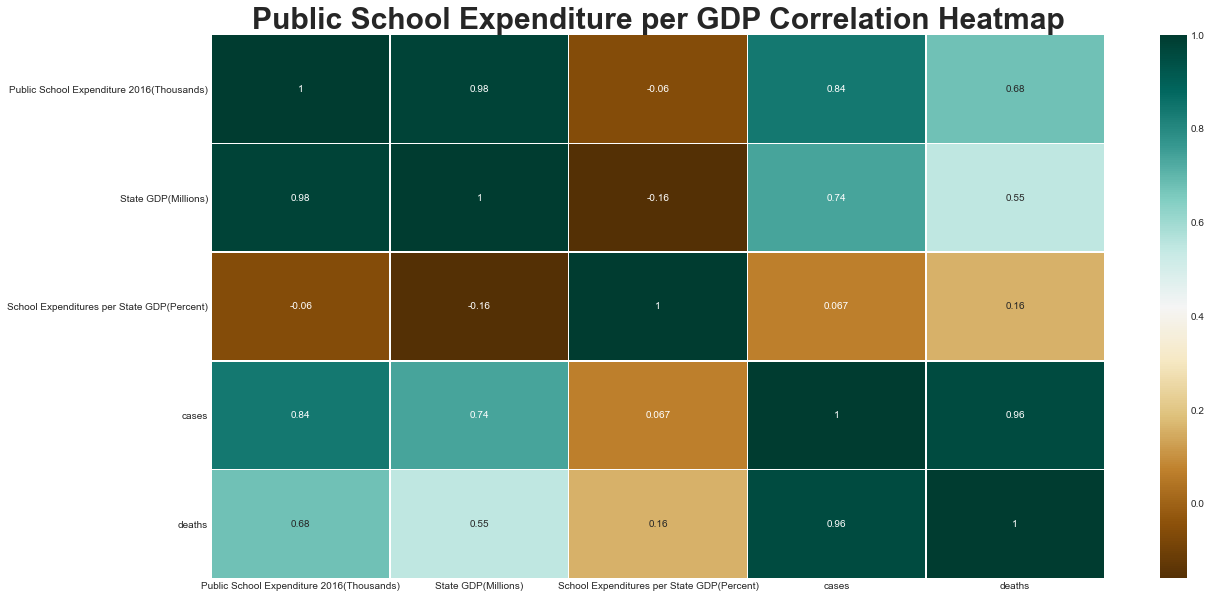

In [56]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Public School Expenditure per GDP Correlation Heatmap', fontweight = 'bold', fontsize = 30);

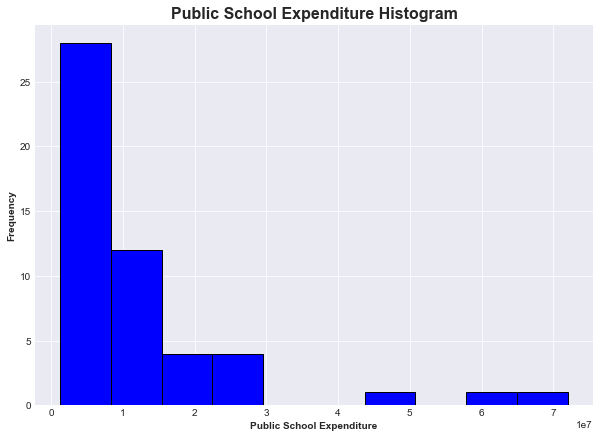

In [57]:
plt.style.use('seaborn-darkgrid')

pseGDP['Public School Expenditure 2016(Thousands)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Public School Expenditure Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Public School Expenditure', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

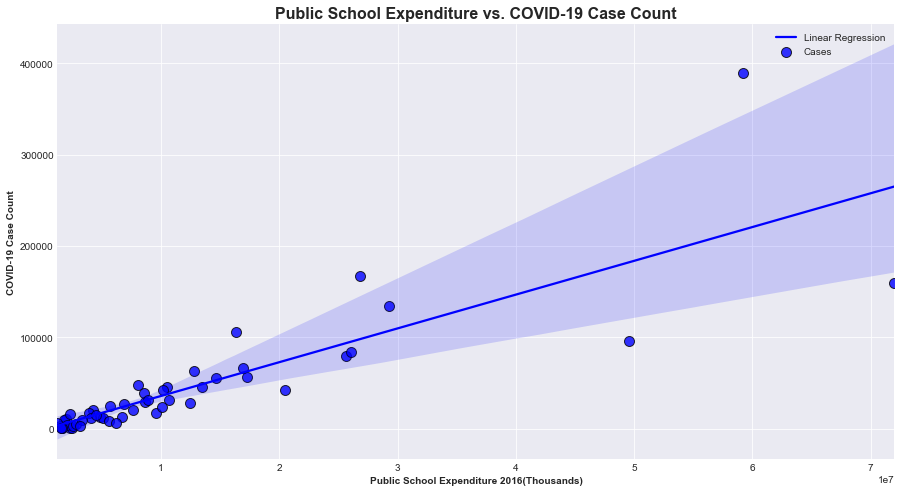

In [58]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Public School Expenditure 2016(Thousands)', y = 'cases', data = pseGDP, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Public School Expenditure vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Public School Expenditure 2016(Thousands)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [59]:
spearmanr(pseGDP['cases'], pseGDP['Public School Expenditure 2016(Thousands)'])

SpearmanrResult(correlation=0.9266063348416289, pvalue=1.8724170563904846e-22)

In [60]:
model1 = sm.OLS(pseGDP['cases'], pseGDP['Public School Expenditure 2016(Thousands)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              192.6
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    8.90e-19
Time:                        12:52:48   Log-Likelihood:                         -605.00
No. Observations:                  51   AIC:                                      1212.
Df Residuals:                      50   BIC:                                      1214.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Public School Expenditure 2016(Thousands)     0.0037      0.000     13.879      0.000       0.003       0.004
==============================================================================
Omnibus:                       45.362   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.735
Skew:                           1.917   Prob(JB):                     1.90e-81
Kurtosis:                      15.658   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

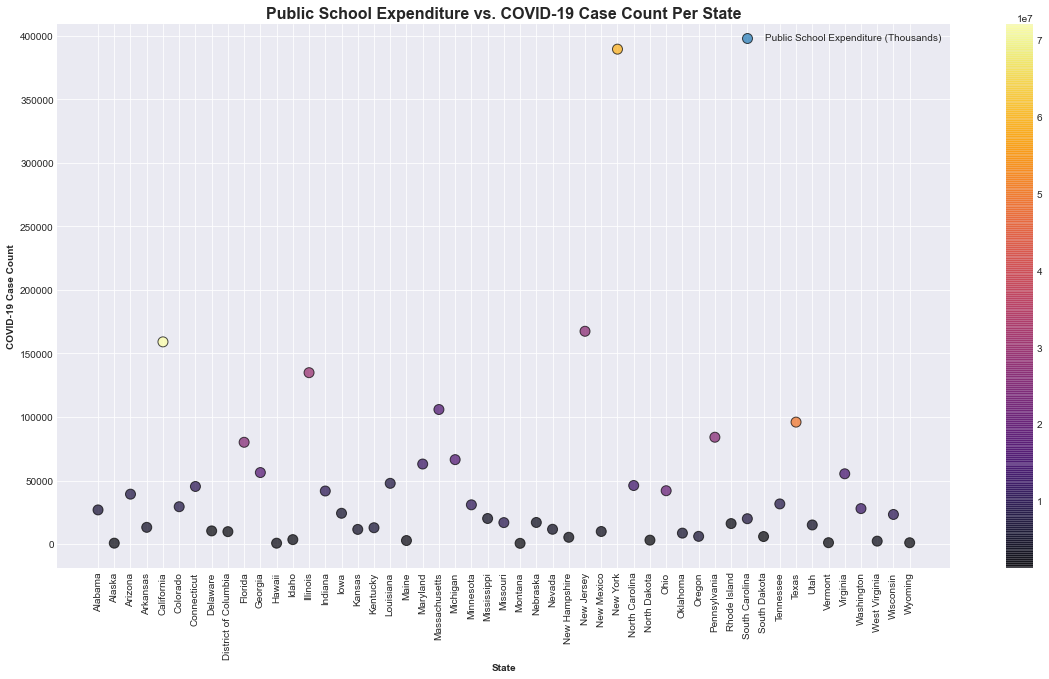

In [61]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = pseGDP['State'] 
y = pseGDP['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = pseGDP['Public School Expenditure 2016(Thousands)'], cmap = 'inferno')
plt.title('Public School Expenditure vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Public School Expenditure (Thousands)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

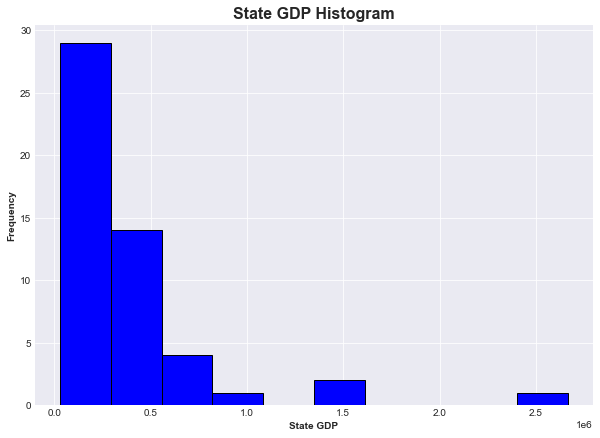

In [62]:
plt.style.use('seaborn-darkgrid')

pseGDP['State GDP(Millions)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('State GDP Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('State GDP', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

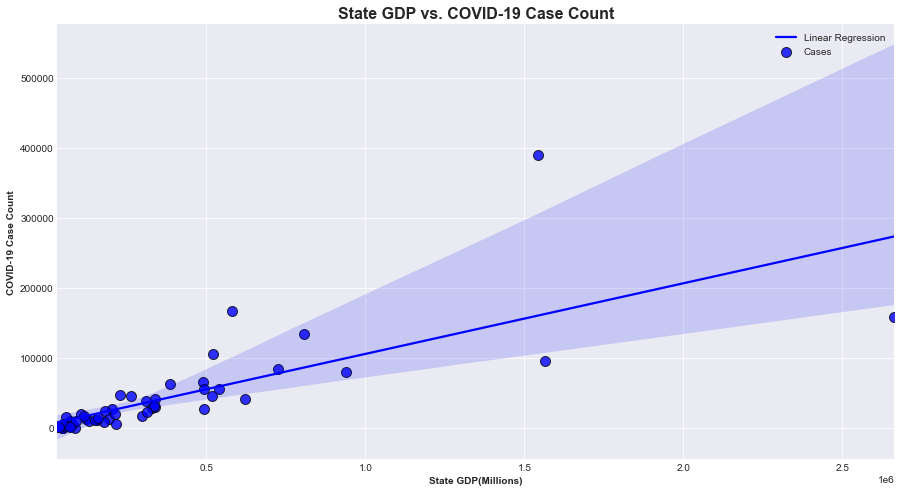

In [63]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'State GDP(Millions)', y = 'cases', data = pseGDP, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('State GDP vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('State GDP(Millions)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [64]:
spearmanr(pseGDP['cases'], pseGDP['State GDP(Millions)'])

SpearmanrResult(correlation=0.9238009049773754, pvalue=4.54245183722127e-22)

In [65]:
model2 = sm.OLS(pseGDP['cases'], pseGDP['State GDP(Millions)']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.678
Method:                 Least Squares   F-statistic:                              108.5
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    4.00e-14
Time:                        12:52:49   Log-Likelihood:                         -615.85
No. Observations:                  51   AIC:                                      1234.
Df Residuals:                      50   BIC:                                      1236.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
State GDP(Millions)     0.1063      0.010     10.416      0.000       0.086       0.127
==============================================================================
Omnibus:                       54.927   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.961
Skew:                           2.513   Prob(JB):                    5.47e-108
Kurtosis:                      17.394   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

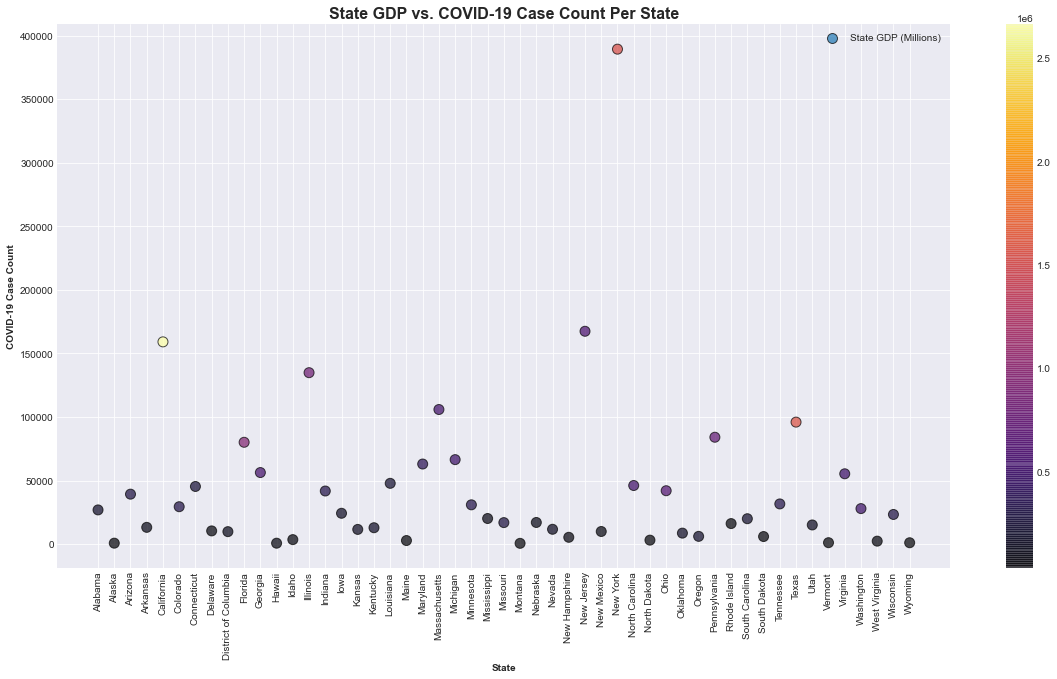

In [66]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = pseGDP['State'] 
y = pseGDP['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = pseGDP['State GDP(Millions)'], cmap = 'inferno')
plt.title('State GDP vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['State GDP (Millions)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

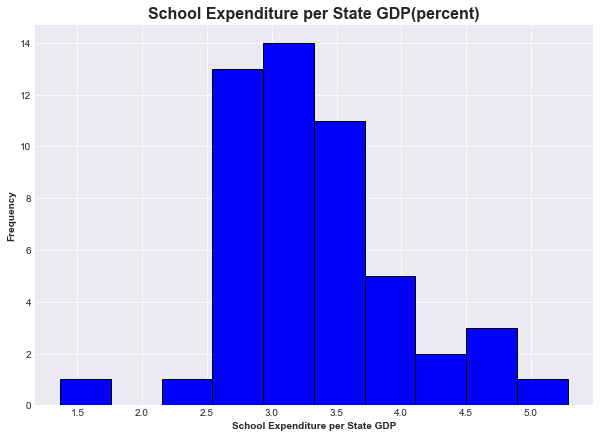

In [67]:
plt.style.use('seaborn-darkgrid')

pseGDP['School Expenditures per State GDP(Percent)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('School Expenditure per State GDP(percent)', fontsize = 16, fontweight = 'bold')
plt.xlabel('School Expenditure per State GDP', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

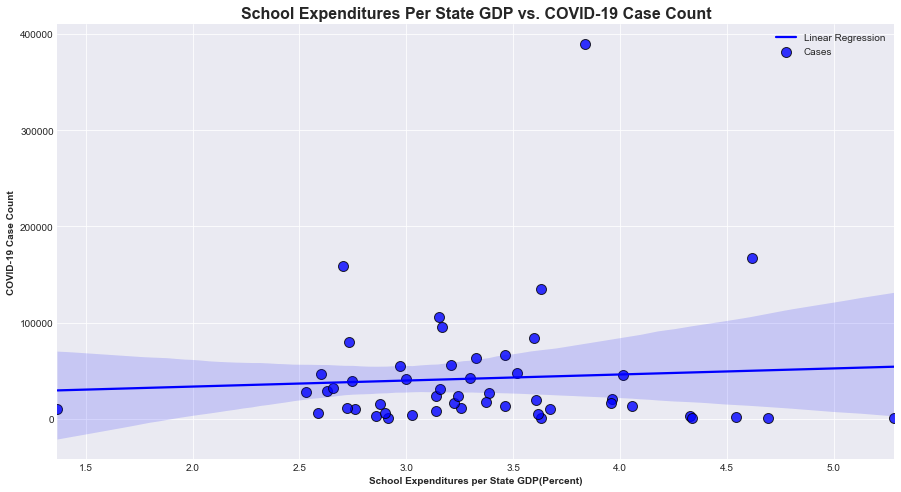

In [68]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'School Expenditures per State GDP(Percent)', y = 'cases', data = pseGDP, color = 'blue', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('School Expenditures Per State GDP vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('School Expenditures per State GDP(Percent)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [69]:
spearmanr(pseGDP['cases'], pseGDP['School Expenditures per State GDP(Percent)'])

SpearmanrResult(correlation=-0.12425339366515838, pvalue=0.3849993269718258)

In [70]:
model3 = sm.OLS(pseGDP['cases'], pseGDP['School Expenditures per State GDP(Percent)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.309
Model:                            OLS   Adj. R-squared (uncentered):              0.295
Method:                 Least Squares   F-statistic:                              22.31
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.92e-05
Time:                        12:52:50   Log-Likelihood:                         -635.86
No. Observations:                  51   AIC:                                      1274.
Df Residuals:                      50   BIC:                                      1276.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
School Expenditures per State GDP(Percent)  1.232e+04   2608.453      4.723      0.000    7081.443    1.76e+04
==============================================================================
Omnibus:                       65.654   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.383
Skew:                           3.376   Prob(JB):                    9.24e-122
Kurtosis:                      17.721   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

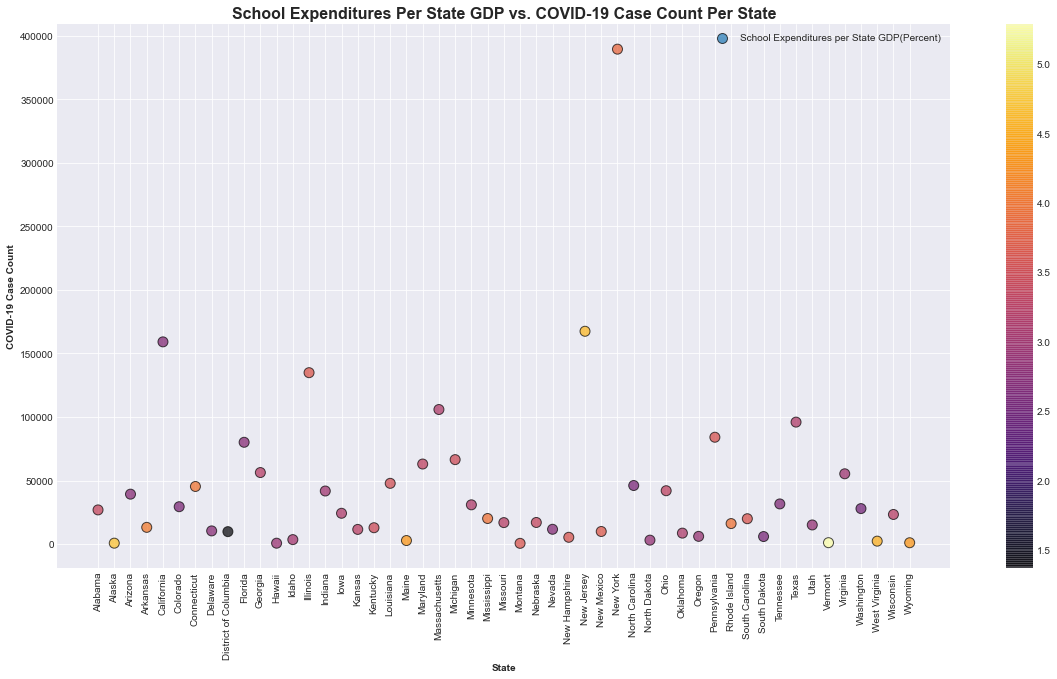

In [71]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = pseGDP['State'] 
y = pseGDP['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = pseGDP['School Expenditures per State GDP(Percent)'], cmap = 'inferno')
plt.title('School Expenditures Per State GDP vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['School Expenditures per State GDP(Percent)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [72]:
model4 = sm.OLS(pseGDP['cases'], pseGDP[['Public School Expenditure 2016(Thousands)', 'State GDP(Millions)', 'School Expenditures per State GDP(Percent)']]).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              173.3
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    9.48e-26
Time:                        12:52:51   Log-Likelihood:                         -582.27
No. Observations:                  51   AIC:                                      1171.
Df Residuals:                      48   BIC:                                      1176.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Public School Expenditure 2016(Thousands)      0.0132      0.001     11.248      0.000       0.011       0.016
State GDP(Millions)                           -0.2962      0.036     -8.305      0.000      -0.368      -0.224
School Expenditures per State GDP(Percent) -1569.9057   1199.984     -1.308      0.197   -3982.635     842.824
==============================================================================
Omnibus:                       19.068   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.800
Skew:                          -0.657   Prob(JB):                     3.47e-17
Kurtosis:                       8.826   Cond. No.                     6.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""